In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

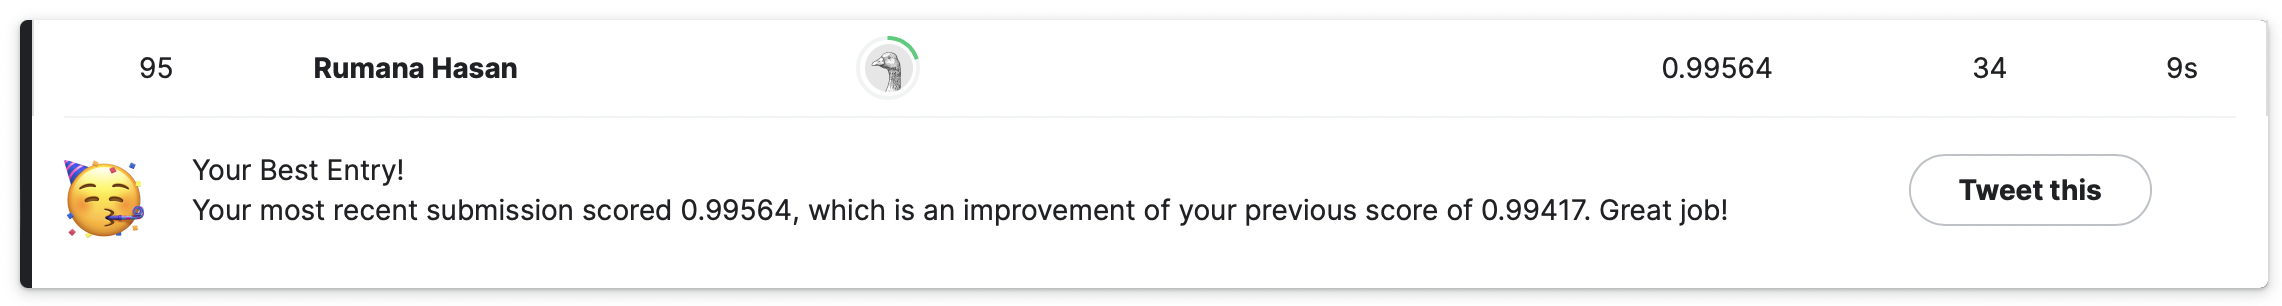

<h2>With 100 epochs test accuracy is 0.99564 and with 30 epochs test accuracy is 0.99417</h2>

In [2]:
import sys
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import pandas as pd
import os
import cv2

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, GlobalAvgPool2D, AveragePooling2D
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Data Preparation</h2>
Load data and read data

In [3]:
train_path=os.path.join('/kaggle/input/digit-recognizer/train.csv')
test_path=os.path.join('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

<h2>Checking For Null Values In Train and Test Dataframe</h2>

<ul>
    <li>isnull() returns boolean values which contains True for NaN value and False for Not Null value</li>
    <li>any() checks any missing value in any column</li>
    <li>describe() gives a summary:</li>
    <ul>
        <li>count : 785, which indicates the number of columns in the train_data</li>
        <li>unique : 1, which indicates there is one unique value acoross all the 785 columns</li>
        <li>top : False, which indicates the unique value is False</li>
        <li>freq : 785, which indicates the False appears in the 785 columns</li>
        </ul>
    <li>Missing values have been checked for both in the Train and Test dataframe. There is no missing value in the Train and Test dataframe.</li>
 </ul>

In [5]:
train_data.isnull()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      False   False   False   False   False   False   False   False   False   
1      False   False   False   False   False   False   False   False   False   
2      False   False   False   False   False   False   False   False   False   
3      False   False   False   False   False   False   False   False   False   
4      False   False   False   False   False   False   False   False   False   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995  False   False   False   False   False   False   False   False   False   
41996  False   False   False   False   False   False   False   False   False   
41997  False   False   False   False   False   False   False   False   False   
41998  False   False   False   False   False   False   False   False   False   
41999  False   False   False   False   False   False   False   False   False   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0       False  ...     False     False     False     False     False   
1       False  ...     False     False     False     False     False   
2       False  ...     False     False     False     False     False   
3       False  ...     False     False     False     False     False   
4       False  ...     False     False     False     False     False   
...       ...  ...       ...       ...       ...       ...       ...   
41995   False  ...     False     False     False     False     False   
41996   False  ...     False     False     False     False     False   
41997   False  ...     False     False     False     False     False   
41998   False  ...     False     False     False     False     False   
41999   False  ...     False     False     False     False     False   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0         False     False     False     False     False  
1         False     False     False     False     False  
2         False     False     False     False     False  
3         False     False     False     False     False  
4         False     False     False     False     False  
...         ...       ...       ...       ...       ...  
41995     False     False     False     False     False  
41996     False     False     False     False     False  
41997     False     False     False     False     False  
41998     False     False     False     False     False  
41999     False     False     False     False     False  

[42000 rows x 785 columns]

In [6]:
train_data.isnull().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [7]:
train_data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test_data

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
27995       0  ...         0         0         0         0         0   
27996       0  ...         0         0         0         0         0   
27997       0  ...         0         0         0         0         0   
27998       0  ...         0         0         0         0         0   
27999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
27995         0         0         0         0         0  
27996         0         0         0         0         0  
27997         0         0         0         0         0  
27998         0         0         0         0         0  
27999         0         0         0         0         0  

[28000 rows x 784 columns]

<h2>Showing values in test dataset</h2>

In [10]:
test_data.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

<h2> Converting test data into numpy array</h2>

In [11]:
test_data=np.array(test_data)
test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
# train_data=np.array(train_data)
# print(train_data.shape)
print(test_data.shape)

(28000, 784)


<h2>Reshape test data into 3D images</h2>

In [13]:
test_data=test_data.reshape(-1,28,28,1)
test_data.shape

(28000, 28, 28, 1)

<h2>Reshape test data into 2D images</h2>

In [14]:
# test_data=test_data.reshape(-1,28,28)

In [15]:
# test_data.shape

<h2>Showing values in the train dataset</h2>

In [16]:
train_data

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [17]:
train_data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

<h2> Pick the label column from the train dataset</h2>

Assign the value of label column into y_train_data variable

In [18]:
y_train_data=train_data['label']
y_train_data.shape

(42000,)

<h2>Converting the label dataset into numpy array</h2>

In [19]:
print(y_train_data)
y_train_full=np.array(y_train_data)
y_train_full

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


array([1, 0, 1, ..., 7, 6, 9])

In [20]:
y_train_full.shape

(42000,)

<h2>Counting the frequency of occurrence for 10 digits</h2>
1 appears 4684 times (high frequency) and 5 appears 3795 times (low frequency) 

In [21]:
# g = sns.countplot(y_train_full)

y_train_data.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<h2>Remove label column from the train dataset</h2>

In [22]:
train_data.pop('label')
train_data.shape

(42000, 784)

<h2>Converting the train dataset into numpy array</h2>

In [23]:
X_train_full=np.array(train_data)

In [24]:
X_train_full

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X_train_full.shape

(42000, 784)

<h2>Reshape train data into 3D images</h2>

In [26]:
X_train_full_reshape=X_train_full.reshape(-1,28,28,1)
X_train_full_reshape.shape

(42000, 28, 28, 1)

<h2>Reshape train data into 2D images</h2>

In [27]:
# X_train_full_reshape=X_train_full.reshape(len(X_train_full),28,28)

In [28]:
# X_train_full_reshape.shape

<h2>Image view</h2>

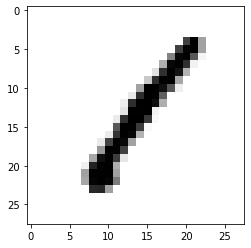

In [29]:
plt.imshow(X_train_full_reshape[0],cmap='binary')

In [30]:
y_train_full[0]

1

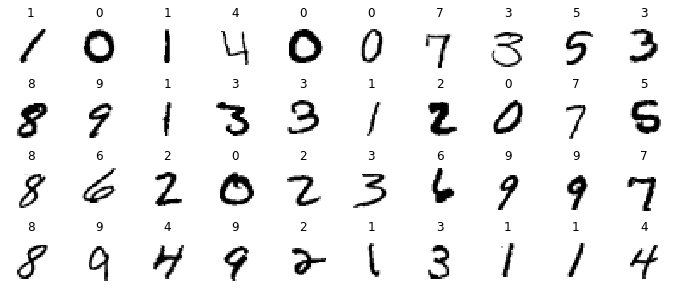

In [31]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full_reshape[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train_full[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [32]:
y_train_full[0:40]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6,
       2, 0, 2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4])

<h2>Normalizing</h2>
Rescale between 0 and 1. This is known as Gray Scale normalization.
CNN will converge faster if we use rescaled or normalized values.

In [33]:
X_train_full=X_train_full_reshape/255
test_data=test_data/255

<h2>Before rescaling</h2>

In [34]:
# X_train_full_reshape[0]

<h2>After rescaling</h2>

In [35]:
# X_train_full[0]

<h2> Creating Train and Test data</h2>
Create Train and Test data from the train dataset

In [36]:
# X_train_f,X_test,y_train_f,y_test=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [37]:
# X_train_f.shape
# y_train_f.shape

In [38]:
# X_test.shape
# y_test.shape

<h2> Creating Train and Validation data</h2>
Create Train and validatin data from the most recent train dataset

In [39]:
# X_train,X_valid,y_train,y_valid=train_test_split(X_train_f,y_train_f,test_size=0.1,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.1,random_state=42)

In [40]:
X_train.shape
# y_train.shape

(37800, 28, 28, 1)

In [41]:
X_valid.shape
# y_valid.shape

(4200, 28, 28, 1)

<h2>ImageDataGenerator</h2>

Create different variations of the original images

In [42]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

<h2>Without CNN </h2>

In [43]:
# np.random.seed(42)
# tf.random.set_seed(42)

#Without CNN

# model=Sequential()

# model.add(Flatten(input_shape=[28,28]))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(400,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(200,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(100,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='softmax'))

Total Parameters: 421,246 <br>

Training Accuracy: 0.9851 <br>
Validation Accuracy: 0.9812 <br>
Test Accuracy: 0.98067 <br>

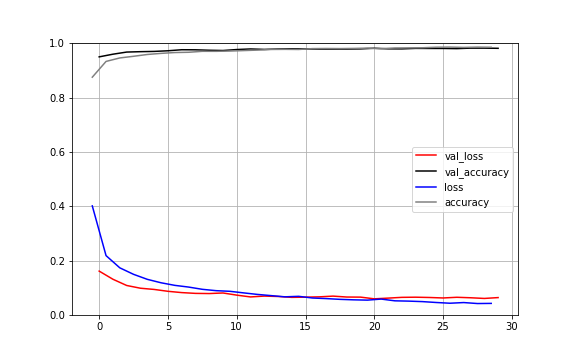



<h2>Functional API</h2>

In [44]:
# np.random.seed(42)
# tf.random.set_seed(42)

## Functional API

# input_=keras.layers.Input(shape=[28,28,1])
# flatten_=keras.layers.Flatten()(input_)
# hidden1=keras.layers.Dense(300,activation='relu')(flatten_)
# hidden2=keras.layers.Dense(100,activation='relu')(hidden1)
# concat=keras.layers.concatenate([flatten_,hidden2])
# output=keras.layers.Dense(10,activation='softmax')(concat)

# model=keras.models.Model(inputs=[input_],outputs=[output])

Total Parameters: 274,450 <br>

Training Accuracy: 1.00 <br>
Validation Accuracy: 0.9771 <br>
Test Accuracy: 0.97471 <br>

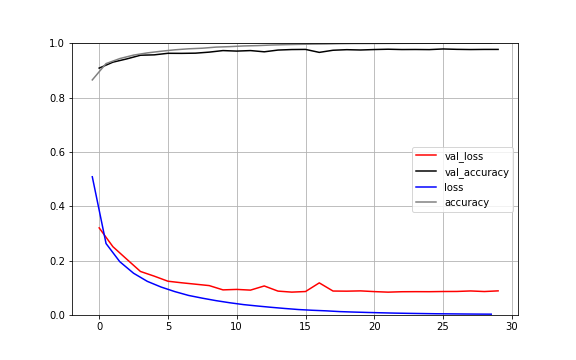

<h2>Convolution Process</h2>

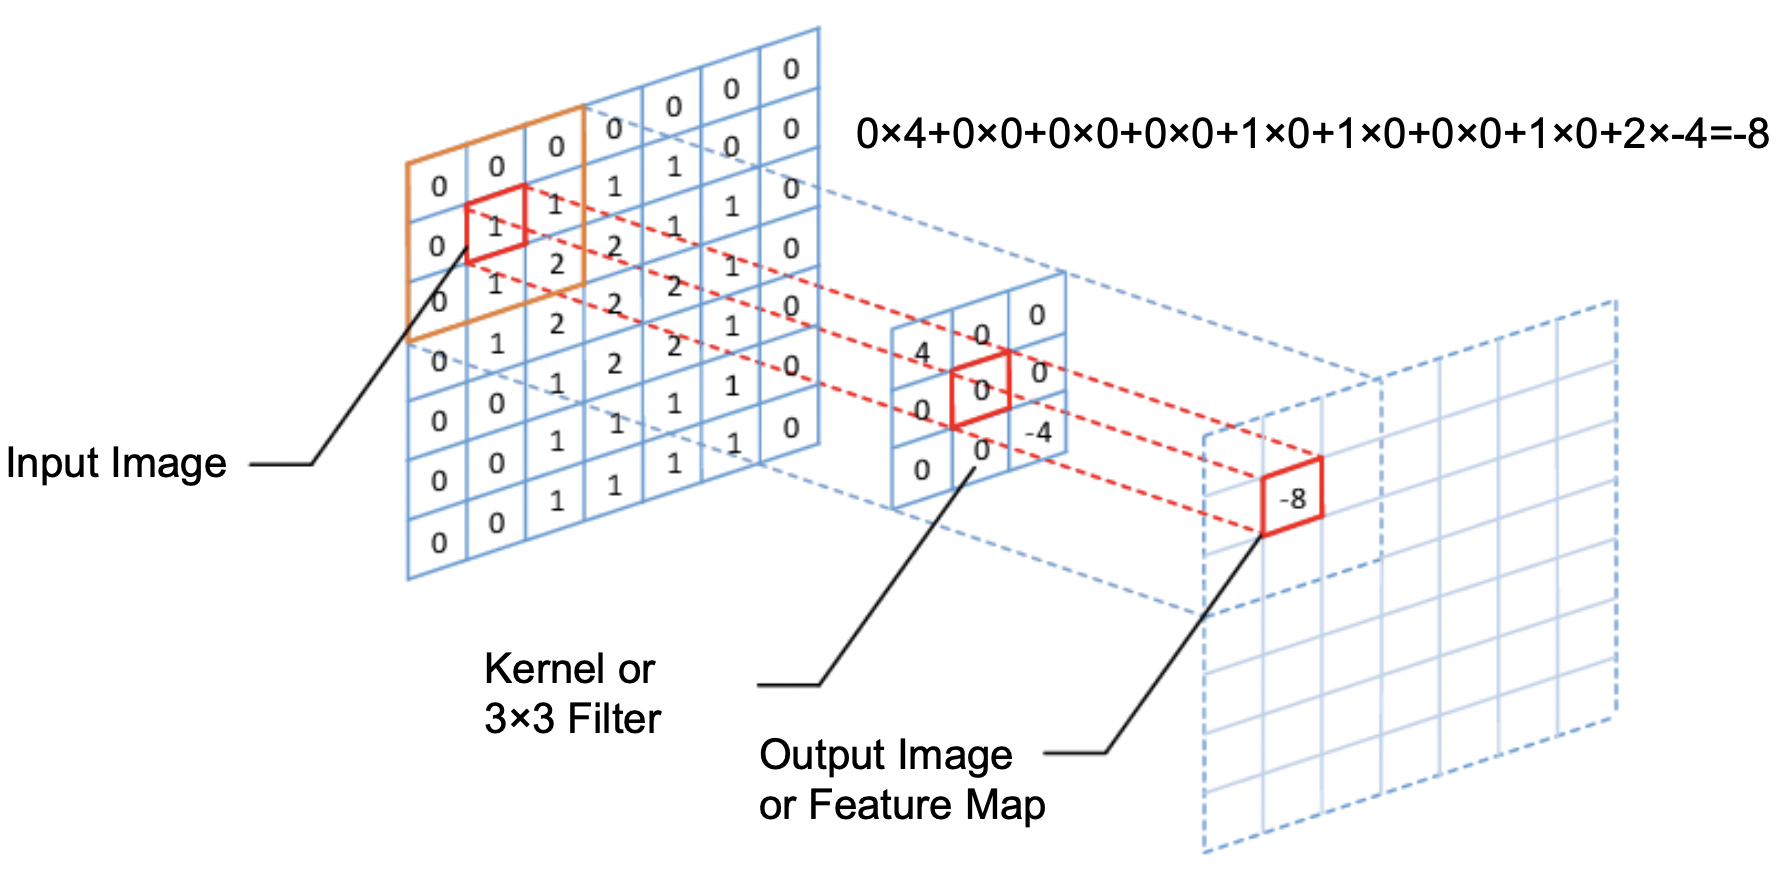

<h2>Max Pooling Process</h2>

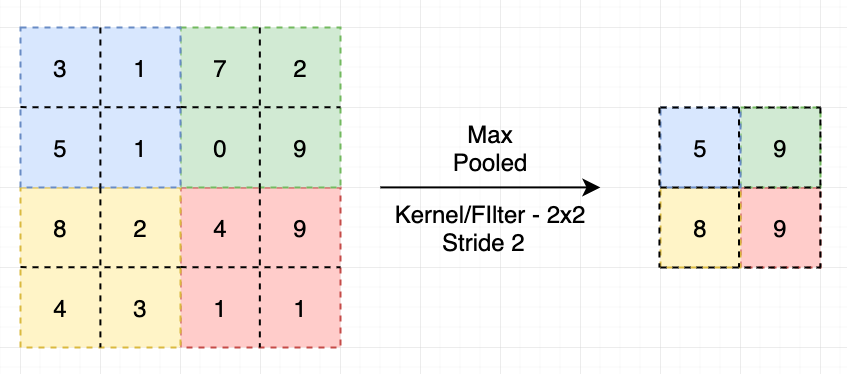

<h2> CNN Architecture</h2>

CNN Architecture: <br>
<ul>
    <li> Sequential model</li>
    <li> Convolution layer with 32 different filters each of size (5,5). Padding same means output images size is same as input image size. Relu activation function has been used. This layer will generate 32 feature maps for each image.</li>
    <li> Adding another convolution layer with the same configuration.</li>
    <li> Add a Max pooling layer of size (2,2) and strides=2, padding=valid means no padding. The image size will shrink.</li>
    <li> Add a dropout layer of rate 0.25 to avoid overfitting.</li>
    <li> Convolution layer with 64 different filters each of size (3,3). Padding same means output images size is same as input image size. Relu activation function has been used. This layer will generate 64 feature maps for each image.</li>
    <li> Adding another convolution layer with the same configuration.</li>
    <li> Add a Max pooling layer of size (2,2) and strides=2, padding=valid means no padding. The image size will shrink.</li>
    <li> Add a dropout layer of rate 0.25 to avoid overfitting.</li>
    <li> Add a flatten layer</li>
    <li> Add a Dense layer of 256 neuron</li>
    <li> Add a Dropout layer of rate 0.5</li>
    <li> Add a Dense layer of 10 neuron with Softmax</li>
    
   </ul>
    

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

# Kaggle

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 5,padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = 5,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [46]:
# np.random.seed(42)
# tf.random.set_seed(42)

##My own experiment
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))



# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

# model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))



# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation = "relu"))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation = "softmax"))

In [47]:
# np.random.seed(42)
# tf.random.set_seed(42)

##my experiment on kaggla
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = 5,padding = 'Same', 
#                 strides=1, activation ='relu',kernel_initializer='he_normal', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 32, kernel_size = 5,padding = 'Same', 
#                 strides=1, activation ='relu',kernel_initializer='he_normal'))
# model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
# # model.add(keras.layers.Lambda(tf.nn.local_response_normalization))
# model.add(Dropout(0.25))


# model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
#                  strides=1, activation ='relu',kernel_initializer='he_normal'))
# model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same', 
#                  strides=1, activation ='relu',kernel_initializer='he_normal'))
# model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
# # model.add(keras.layers.Lambda(tf.nn.local_response_normalization))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))

# model.add(Dense(10, activation = "softmax"))

<h2>LeNet-5</h2>

In [48]:
# np.random.seed(42)
# tf.random.set_seed(42)

# ## LeNet-5

# model=Sequential()
# model.add(Conv2D(filters=6, kernel_size=5,strides=1, padding='same', activation='tanh', input_shape=(28, 28, 1)))
# model.add(AveragePooling2D(pool_size=2,strides=2))
# model.add(Conv2D(filters=16, kernel_size=5,strides=1, padding='valid', activation='tanh'))
# model.add(AveragePooling2D(pool_size=2,strides=2))
# model.add(Flatten())
# model.add(Dense(120, activation='tanh'))
# model.add(Dense(84, activation='tanh'))
# model.add(Dense(10, activation='softmax'))

Total Parameters: 61,706 <br>

Training Accuracy: 0.9990 <br>
Validation Accuracy: 0.9888 <br>
Test Accuracy: 0.98639 <br>

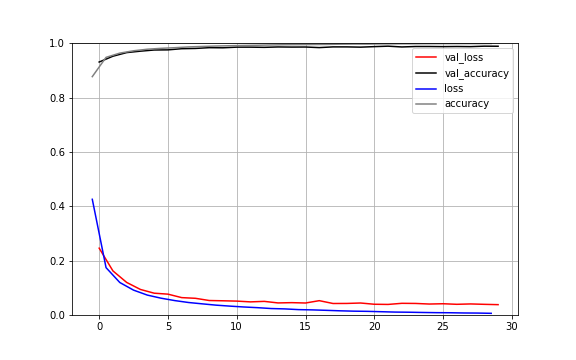

In [49]:
# np.random.seed(42)
# tf.random.set_seed(42)

##using relu and maxpooling in LeNet-5

# model=Sequential()
# model.add(Conv2D(filters=64, kernel_size=3,strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=2,strides=2))
# model.add(Conv2D(filters=128, kernel_size=3,strides=1, padding='valid', activation='relu'))
# model.add(MaxPooling2D(pool_size=2,strides=2))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(10, activation='softmax'))

Total Parameters: 638,590 <br>

Training Accuracy: 1.00 <br>
Validation Accuracy: 0.9898 <br>
Test Accuracy: 0.98914 <br>

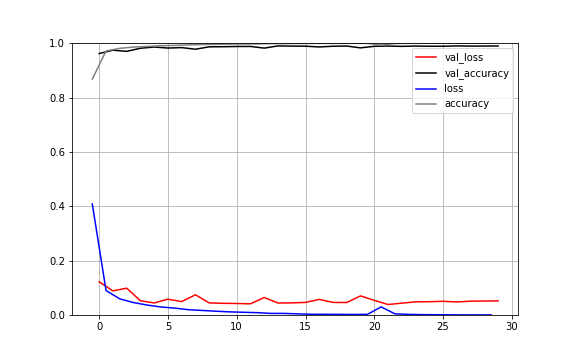

<h2>AkexNet</h2>

In [50]:
# np.random.seed(42)
# tf.random.set_seed(42)

# ##AlexNet

# model=Sequential()
# model.add(Conv2D(filters=96, kernel_size=11,strides=4, padding='valid', activation='relu', input_shape=(227, 227, 3)))
# model.add(MaxPooling2D(pool_size=3,strides=2,padding='valid'))
# model.add(Conv2D(filters=256, kernel_size=5,strides=1, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=3,strides=2,padding='valid'))
# model.add(Conv2D(filters=384, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=384, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=3,strides=2,padding='valid'))
# model.add(Flatten())
# model.add(Dense(4096,activation='relu'))
# model.add(Dense(4096,activation='relu'))
# model.add(Dense(1000,activation='softmax'))

In [51]:
## VGG-16

# model=Sequential()
# model.add(Conv2D(filters=64, kernel_size=3,strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)))
# model.add(Conv2D(filters=64, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2,strides=2))
# model.add(Conv2D(filters=128, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2,strides=2))
# model.add(Conv2D(filters=256, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2,strides=2))
# model.add(Conv2D(filters=512, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2,strides=2))
# model.add(Conv2D(filters=512, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=3,strides=1, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2,strides=2))
# model.add(Flatten())
# model.add(Dense(4096,activation='relu'))
# model.add(Dense(4096,activation='relu'))
# model.add(Dense(1000,activation='softmax'))

<h2>ResNet</h2>

In [52]:
# np.random.seed(42)
# tf.random.set_seed(42)

# ##ResNet

# from functools import partial

# DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
#                         padding="SAME", use_bias=False)

# class ResidualUnit(keras.layers.Layer):
#     def __init__(self, filters, strides=1, activation="relu", **kwargs):
#         super().__init__(**kwargs)
#         self.activation = keras.activations.get(activation)
#         self.main_layers = [
#             DefaultConv2D(filters, strides=strides),
#             keras.layers.BatchNormalization(),
#             self.activation,
#             DefaultConv2D(filters),
#             keras.layers.BatchNormalization()]
#         self.skip_layers = []
#         if strides > 1:
#             self.skip_layers = [
#                 DefaultConv2D(filters, kernel_size=1, strides=strides),
#                 keras.layers.BatchNormalization()]

#     def call(self, inputs):
#         Z = inputs
#         for layer in self.main_layers:
#             Z = layer(Z)
#         skip_Z = inputs
#         for layer in self.skip_layers:
#             skip_Z = layer(skip_Z)
#         return self.activation(Z + skip_Z)

In [53]:
# model = keras.models.Sequential()
# model.add(DefaultConv2D(64, kernel_size=3, strides=1,
#                         input_shape=[28, 28, 1]))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.MaxPool2D(pool_size=2, strides=2, padding="SAME"))
# prev_filters = 64
# for filters in [64] * 2 + [128] * 2 + [256] * 2:
#     strides = 1 if filters == prev_filters else 2
#     model.add(ResidualUnit(filters, strides=strides))
#     prev_filters = filters
# model.add(keras.layers.GlobalAvgPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(10, activation="softmax"))



# optimizer=SGD(learning_rate=0.001)

Total Parameters: 2,781,002 <br>

Training Accuracy: 1.00 <br>
Validation Accuracy: 0.9938 <br>
Test Accuracy: 0.9935 <br>


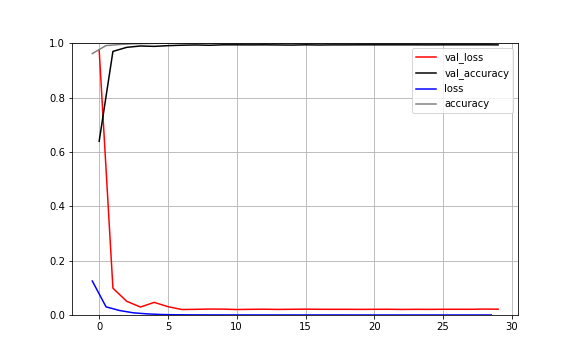


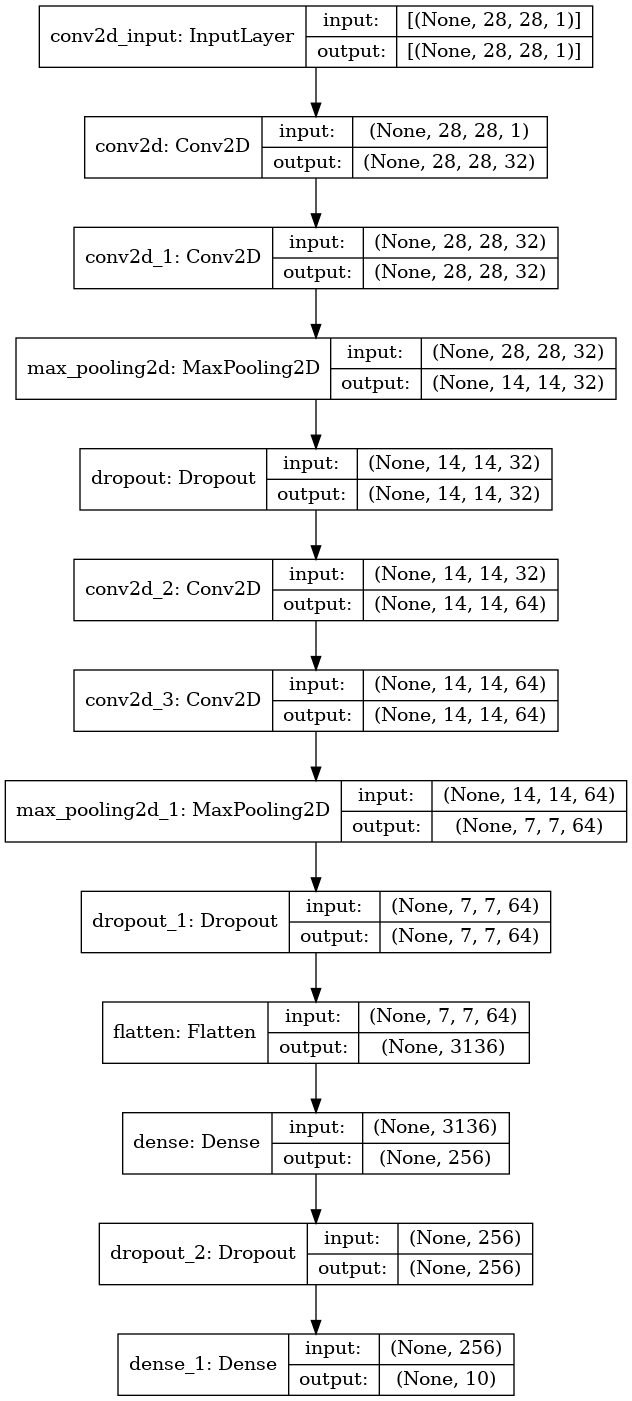

In [54]:
keras.utils.plot_model(model, "Digit.png", show_shapes=True)

In [55]:
# optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer=SGD(learning_rate=0.1)
# optimizer=Adam()

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [56]:
batch_size=86
epochs=30
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = datagen.flow(X_valid,y_valid, batch_size=batch_size),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
439/439 [==============================] - 19s 27ms/step - loss: 0.7582 - accuracy: 0.7467 - val_loss: 0.1573 - val_accuracy: 0.9521
Epoch 2/30
439/439 [==============================] - 11s 25ms/step - loss: 0.2140 - accuracy: 0.9338 - val_loss: 0.1433 - val_accuracy: 0.9552
Epoch 3/30
439/439 [==============================] - 11s 25ms/step - loss: 0.1587 - accuracy: 0.9526 - val_loss: 0.0920 - val_accuracy: 0.9750
Epoch 4/30
439/439 [==============================] - 11s 25ms/step - loss: 0.1228 - accuracy: 0.9631 - val_loss: 0.0837 - val_accuracy: 0.9731
Epoch 5/30
439/439 [==============================] - 11s 24ms/step - loss: 0.1099 - accuracy: 0.9665 - val_loss: 0.0705 - val_accuracy: 0.9769
Epoch 6/30
439/439 [==============================] - 11s 25ms/step - loss: 0.0978 - accuracy: 0.9704 - val_loss: 0.0518 - val_accuracy: 0.9860
Epoch 7/30
439/439 [==============================] - 12s 27ms/step - loss: 0.0849 - accuracy: 0.9734 - val_loss: 0.0490 - val_accuracy:

In [57]:
# history=model.fit(X_train,y_train,epochs=30,batch_size=86,validation_data=(X_valid,y_valid),verbose=1)

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [59]:
# score=model.evaluate(X_test,y_test)
# print(score)
# print('Test Loss :' ,score[0])
# print('Test Accuracy :' ,score[1])

In [60]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 439}

In [61]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   0.758159  0.746725  0.157308      0.952143
1   0.214038  0.933818  0.143320      0.955238
2   0.158688  0.952644  0.092002      0.975000
3   0.122794  0.963117  0.083743      0.973095
4   0.109922  0.966538  0.070474      0.976905
5   0.097828  0.970409  0.051800      0.985952
6   0.084934  0.973379  0.049029      0.984524
7   0.080467  0.975898  0.056695      0.982619
8   0.076173  0.976826  0.044718      0.987143
9   0.071412  0.978496  0.040035      0.988333
10  0.065787  0.980087  0.036954      0.988571
11  0.063939  0.980882  0.036526      0.990238
12  0.061819  0.981121  0.039351      0.986667
13  0.057955  0.983004  0.032105      0.989286
14  0.056347  0.983216  0.038060      0.989762
15  0.053113  0.984197  0.031705      0.991190
16  0.051177  0.983720  0.036196      0.989048
17  0.053370  0.984435  0.035522      0.989286
18  0.053295  0.984515  0.041557      0.986667
19  0.048949  0.985576  0.031925      0.989762
20  0.046938  0.985549  0.038677      0.988095
21  0.047329  0.986026  0.029731      0.990714
22  0.042398  0.986981  0.031106      0.990952
23  0.042389  0.986769  0.034249      0.990000
24  0.039711  0.988466  0.027181      0.991190
25  0.041610  0.986451  0.032036      0.990714
26  0.039369  0.988280  0.026547      0.992857
27  0.038353  0.988651  0.028841      0.991429
28  0.041662  0.987273  0.026700      0.992381
29  0.035497  0.989155  0.027317      0.991905

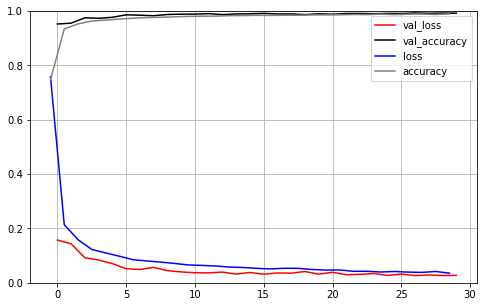

In [64]:
colors=['red','black']
pd.DataFrame(history.history)[['val_loss','val_accuracy']].plot(figsize=(8,5),color=colors)

plt.plot(np.arange(-0.5,29,1),history.history['loss'],color='blue',label='loss')
plt.plot(np.arange(-0.5,29,1),history.history['accuracy'],color='gray',label='accuracy')
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('Kaggle.png')
plt.show()


With 30 epochs <br>

Training Accuracy: 0.9885 <br>
Validation Accuracy: 0.9917 <br>
Test Accuracy: 0.99417 <br>

With 100 epochs <br>

Training Accuracy: 0.9947 <br>
Validation Accuracy: 0.9936 <br>
Test Accuracy: 0.99564 <br>

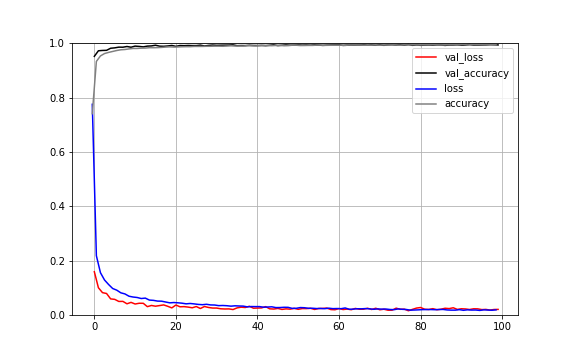


In [65]:
# X_new=X_test[:10]
# y_pred=np.argmax(model.predict(X_new),axis=-1)
# y_pred

In [66]:
# y_test[:10]

In [67]:
# y_pred=np.argmax(model.predict(X_test),axis=-1)
# y_pred

In [68]:
# cm = metrics.confusion_matrix(y_test, y_pred)
# print(cm)

In [69]:
# plt.figure(figsize=(10,10))
# sns.heatmap(cm,annot=True,fmt='.2f',linewidths=1,square=True,cmap='Blues_r')
# plt.ylabel('Actual label',fontsize=12)
# plt.xlabel('Predicted label',fontsize=12)
# all_sample_title='Accuracy Score:{0}'.format(score[1])
# plt.title(all_sample_title,fontsize=20)

In [70]:
# y_test_df=pd.DataFrame(y_test)
# y_test_df

In [71]:
# y_pred_df=pd.DataFrame(y_pred)
# y_pred_df

In [72]:
# y_test_count = sns.countplot(y_test)

# y_test_df.value_counts()

In [73]:
# y_pred_count = sns.countplot(y_pred)

# y_pred_df.value_counts()

In [74]:
result=model.predict(test_data)
result=np.argmax(result,axis=1)
result=pd.Series(result,name='Label')
result

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [75]:
ID=pd.Series(range(1,(len(result)+1)),name='ImageId')
# ID
submission=pd.concat([ID,result],axis=1)
# print(submission)
submission.to_csv('digit_mnist_CNN.csv',index=False)

In [76]:
pd.read_csv('digit_mnist_CNN.csv',index_col=0)


Label
ImageId       
1            2
2            0
3            9
4            0
5            3
...        ...
27996        9
27997        7
27998        3
27999        9
28000        2

[28000 rows x 1 columns]